In [1]:
import pandas as pd

# Read data file
pumpkins = pd.read_csv("../data/US-pumpkins.csv")

# Filter out any rows that don't use price per bushel
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
# Count how many cell in each columns are empty
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [3]:
# Keep only columns that are relevant to this ML model
new_columns = ["Package", "Date", "Low Price", "High Price", "Month"]

pumpkins = pumpkins.drop([col for col in pumpkins.columns if col not in new_columns], axis=1)
pumpkins.head()

,Package,Date,Low Price,High Price
70,1 1/9 bushel cartons,9/24/16,15.0,15.0
71,1 1/9 bushel cartons,9/24/16,18.0,18.0
72,1 1/9 bushel cartons,10/1/16,18.0,18.0
73,1 1/9 bushel cartons,10/1/16,17.0,17.0
74,1 1/9 bushel cartons,10/8/16,15.0,15.0


In [4]:
# Calculate average price from high and low price columns
price = (pumpkins["Low Price"] + pumpkins["High Price"]) / 2

# Extract month from Date column
month = pd.DatetimeIndex(pumpkins["Date"]).month

# Create a new dataframe with desired columns
new_pumpkins = pd.DataFrame({"Month": month, "Package": pumpkins["Package"], "Low Price": pumpkins["Low Price"],
                             "High Price": pumpkins["High Price"], })

In [5]:
# Convert price of all cells by 1 1/9 bushel by dividing by 1 1/9
new_pumpkins.loc[new_pumpkins["Package"].str.contains("1 1/9"), "Price"] = price/(10/9)

# Convert price of all cells by 1/2 bushel by dividing by 1/2
new_pumpkins.loc[new_pumpkins["Package"].str.contains("1/2"), "Price"] = price/(1/2)

new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


In [6]:
new_pumpkins.tail()

,Month,Package,Low Price,High Price,Price
1738,9,1/2 bushel cartons,15.00,15.0,30.00
1739,9,1/2 bushel cartons,13.75,15.0,28.75
1740,9,1/2 bushel cartons,10.75,15.0,25.75
1741,9,1/2 bushel cartons,12.00,12.0,24.00
1742,9,1/2 bushel cartons,12.00,12.0,24.00


In [8]:
import matplotlib.pyplot as plt

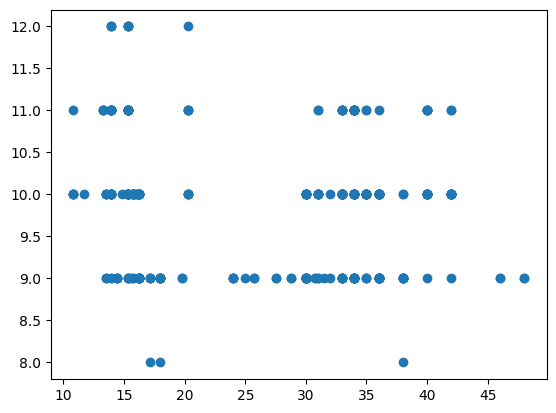

In [9]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price,month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

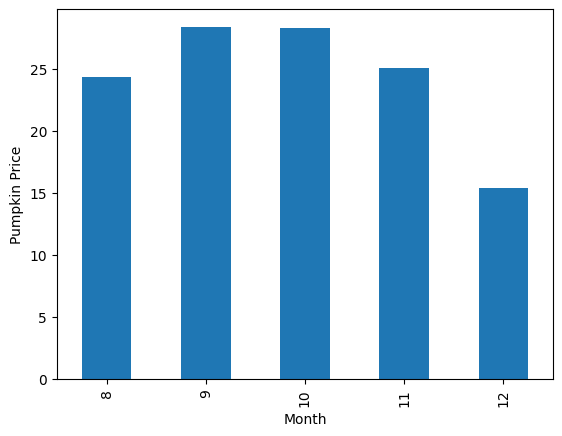

In [10]:
new_pumpkins.groupby(["Month"])["Price"].mean().plot(kind="bar")
plt.ylabel("Pumpkin Price")